<a href="https://colab.research.google.com/github/sabaakram539/Quikr_Car_prediction_Model/blob/main/Quikr_Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding**

We are already aware about the Quikr.com which is a platform to sell the used products. Today in our project we are going to predict the price of the used cars based on its features like Compay, model, kms_driven, Pterol or diesel etc.
The quickr dataset is downloaded from the Kaggle.com. Let's dig in.

# **2. Data Understanding**

>> ## **Importing the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car=pd.read_csv("quikr_car - quikr_car.csv")

In [3]:
car.shape

(892, 6)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


>> ## **Data Cleaning**

In [6]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
car['name']=car['name'].str.split().str.slice(0,3).str.join(" ")

In [8]:
car['year'].value_counts()

2015    117
2014     94
2013     94
2016     76
2012     75
       ... 
cab       1
Sumo      1
tion      1
SELL      1
zire      1
Name: year, Length: 61, dtype: int64

In [9]:
car=car[car['year'].str.isnumeric()]

In [10]:
car['year']=car['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [12]:
car.Price.value_counts()

Ask For Price    23
2,50,000         16
3,50,000         12
4,00,000         11
1,80,000         11
                 ..
7,95,000          1
31,00,000         1
1,23,000          1
4,10,000          1
1,68,000          1
Name: Price, Length: 273, dtype: int64

In [13]:
car=car[car.Price!="Ask For Price"]

In [14]:
car['Price']=car['Price'].str.replace(",","").astype(int)

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [16]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [17]:
car=car[car['kms_driven']!="Petrol"]

In [18]:
car['kms_driven']=car['kms_driven'].str.replace(",","").str.split().str[0].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [20]:
car['fuel_type'].isnull().sum()

1

In [21]:
car=car[~car['fuel_type'].isna()]

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [23]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [24]:
car[car['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [25]:
car=car[car['Price']<6e6]

In [26]:
car=car.reset_index(drop=True)

In [27]:
car.to_csv("cleaned_car")

# **3. Exploratory Data Analysis**

In [28]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


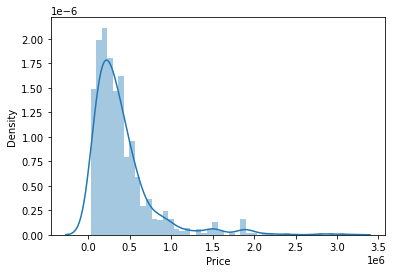

In [29]:
sns.distplot(car['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


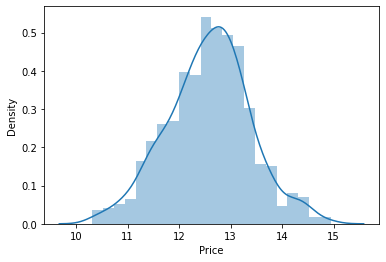

In [30]:
sns.distplot(np.log(car['Price']))

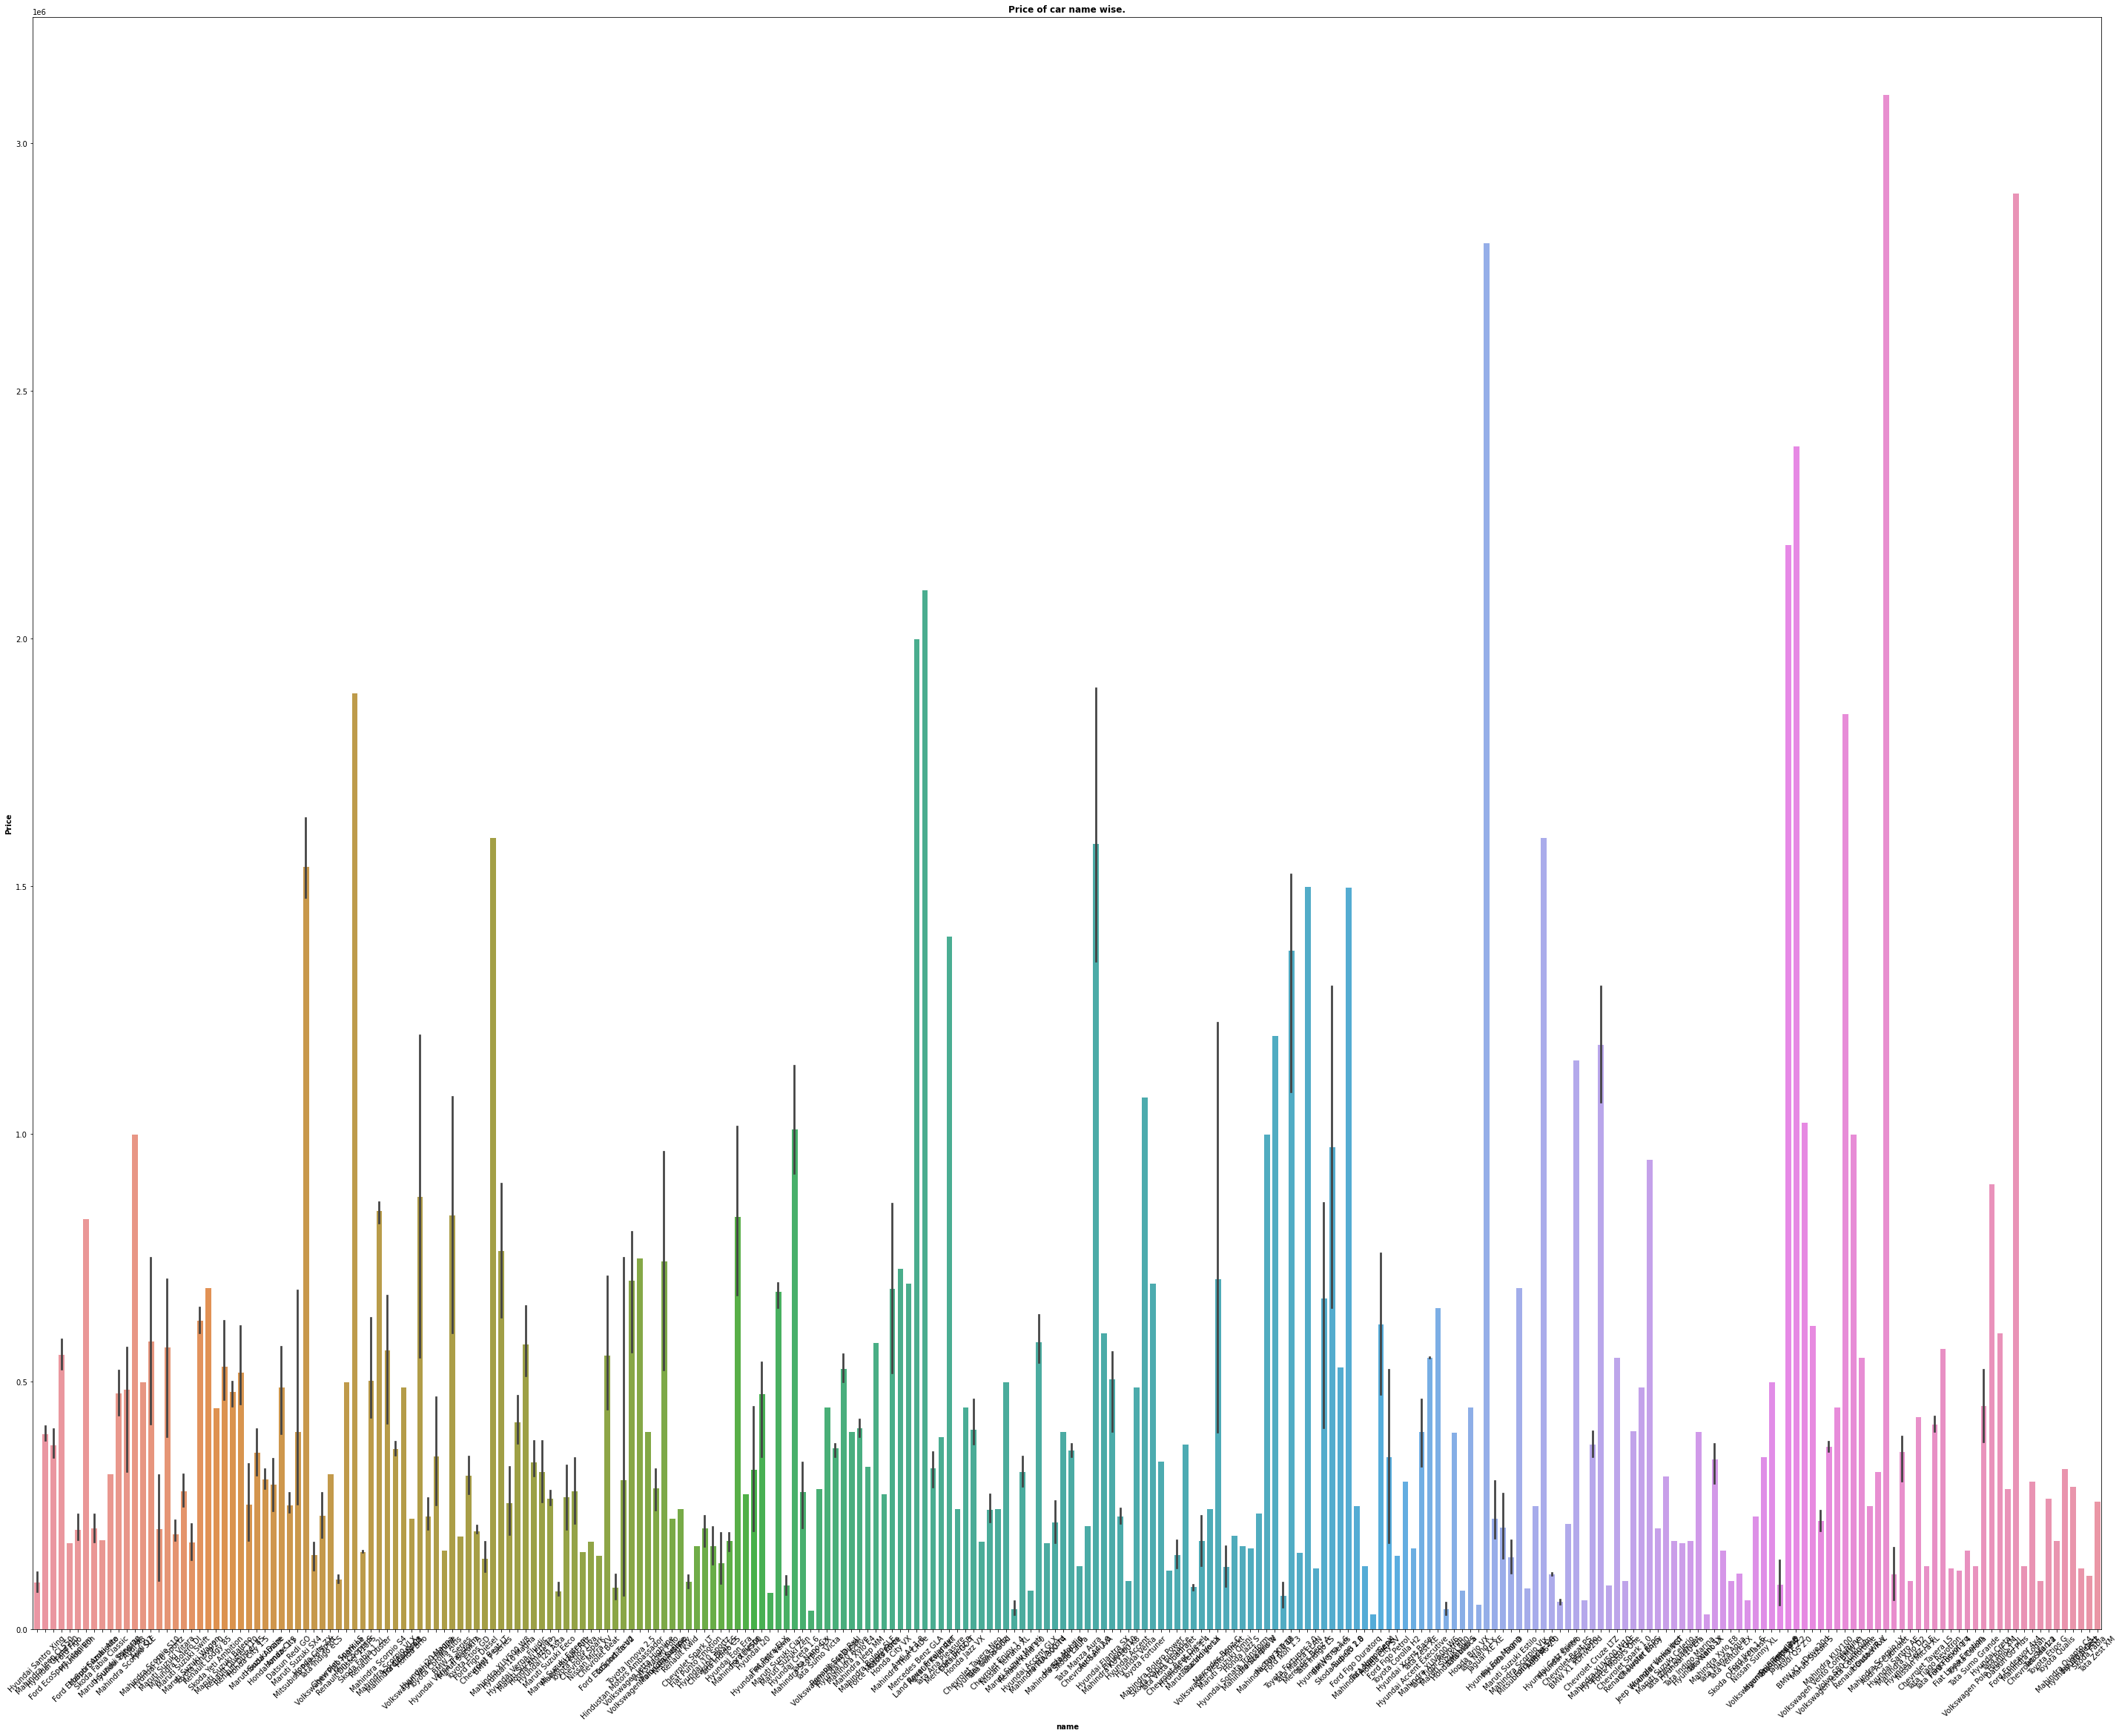

In [31]:
plt.figure(figsize=(50,40))
plt.xlabel("Name of Car",fontweight='bold')
plt.ylabel("Price of Car",fontweight='bold')
plt.title("Price of car name wise.",fontweight='bold')
sns.barplot(x=car['name'],y=car['Price'],edgecolor = 'w')
plt.xticks(rotation=45)
plt.show()

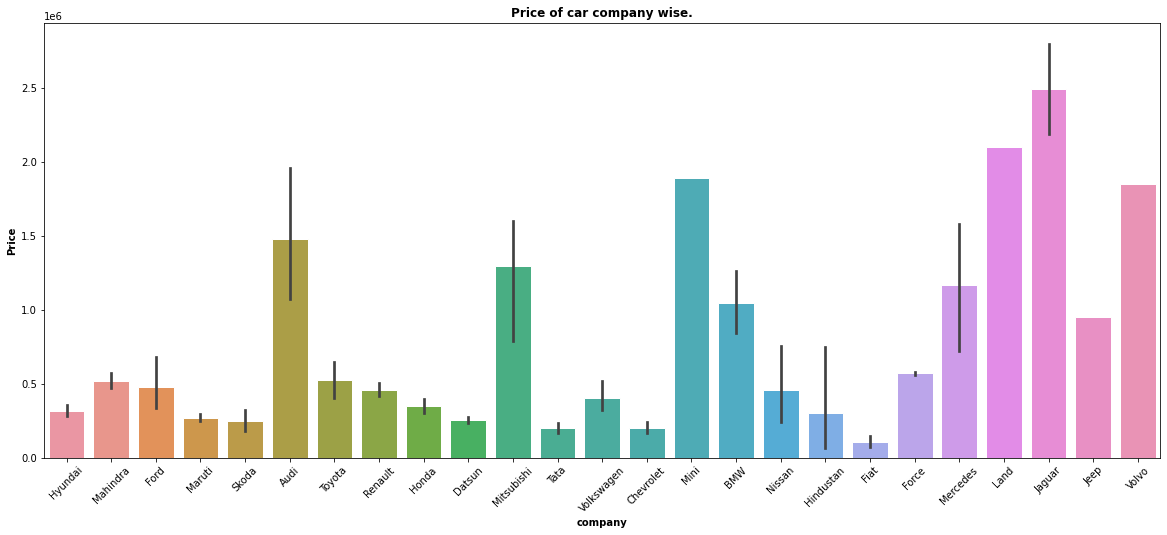

In [32]:
plt.figure(figsize=(20,8))
plt.xlabel("Company of Car",fontweight='bold')
plt.ylabel("Price of Car",fontweight='bold')
plt.title("Price of car company wise.",fontweight='bold')
sns.barplot(x=car['company'],y=car['Price'],edgecolor = 'w')
plt.xticks(rotation=45)
plt.show()

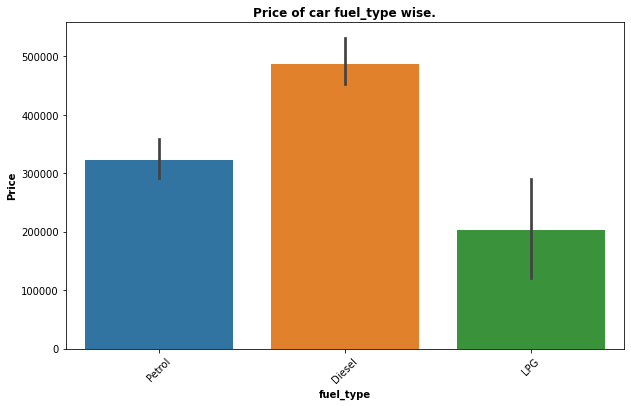

In [33]:
plt.figure(figsize=(10,6))
plt.xlabel("fuel_type of Car",fontweight='bold')
plt.ylabel("Price of Car",fontweight='bold')
plt.title("Price of car fuel_type wise.",fontweight='bold')
sns.barplot(x=car['fuel_type'],y=car['Price'],edgecolor = 'w')
plt.xticks(rotation=45)
plt.show()

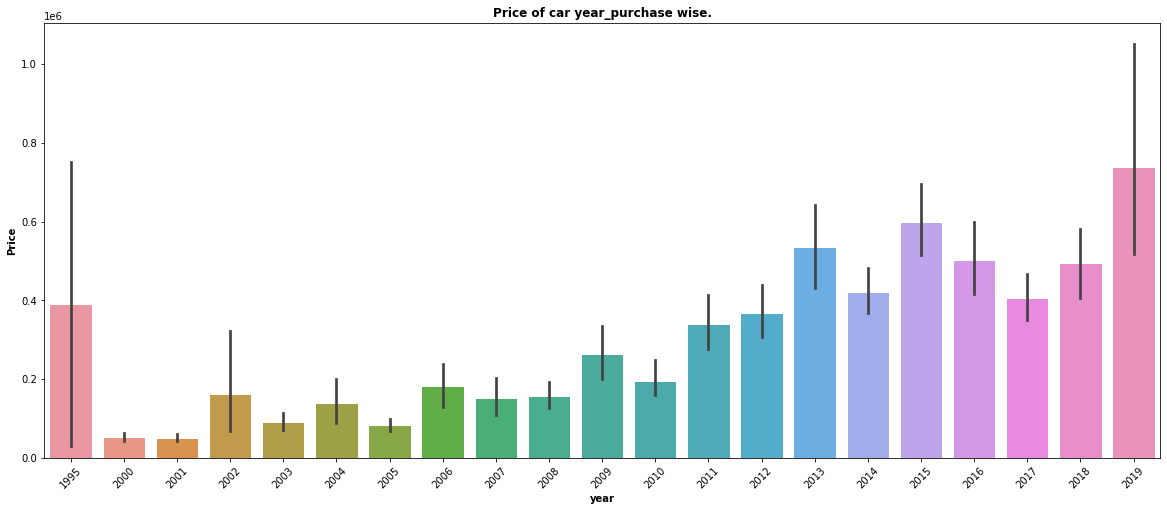

In [34]:
plt.figure(figsize=(20,8))
plt.xlabel("year of purchase of Car",fontweight='bold')
plt.ylabel("Price of Car",fontweight='bold')
plt.title("Price of car year_purchase wise.",fontweight='bold')
sns.barplot(x=car['year'],y=car['Price'],edgecolor = 'w')
plt.xticks(rotation=45)
plt.show()

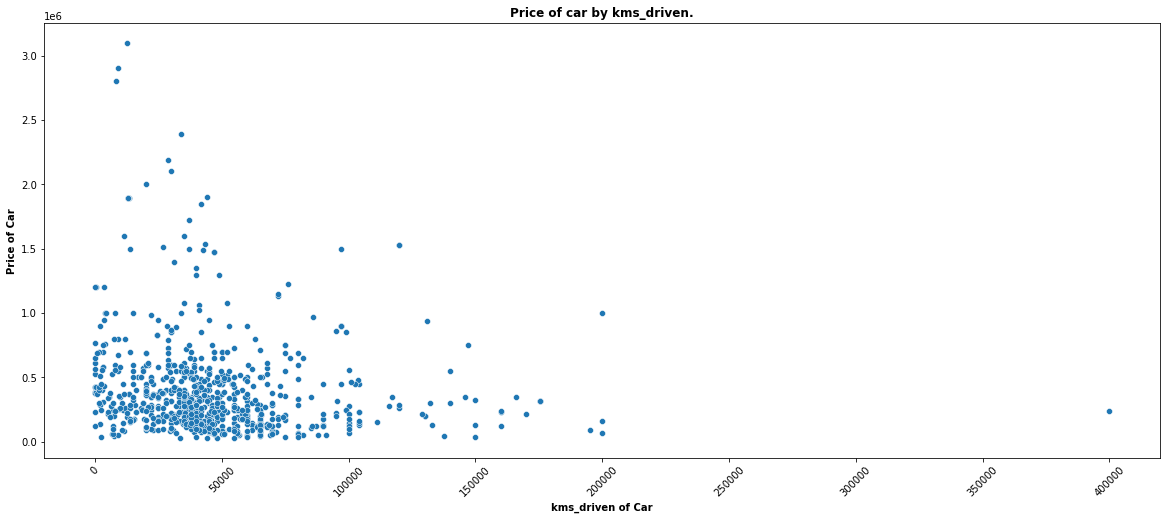

In [35]:
plt.figure(figsize=(20,8))
plt.xlabel("kms_driven of Car",fontweight='bold')
plt.ylabel("Price of Car",fontweight='bold')
plt.title("Price of car by kms_driven.",fontweight='bold')
sns.scatterplot(x=car['kms_driven'],y=car['Price'])
plt.xticks(rotation=45)
plt.show()

# **4. Model Building**

In [36]:
x=car.drop(columns="Price")
y=np.log(car['Price'])

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','year','fuel_type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [39]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [41]:
column_transformed=make_column_transformer((OneHotEncoder(ohe.categories_),['name','company','year','fuel_type']),remainder='passthrough')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
lr=LinearRegression()

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
pipe=make_pipeline(column_transformed,lr)
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'B...
                                                                            array([1995, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                drop

In [46]:
y_pred=pipe.predict(x_test)

In [47]:
r2_score(y_test,y_pred)

0.693918629457815

# **5. Model Improvement**

>> **Using Random State**

In [48]:
scores=[]
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lr=LinearRegression()
  pipe=make_pipeline(column_transformed,lr)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))

In [49]:
np.argmax(scores)

727

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))

In [51]:
lr=LinearRegression()
pipe=make_pipeline(column_transformed,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
(r2_score(y_test,y_pred))

0.8719161389787353

>> **Building Other models and comparing**

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [53]:
linear=LinearRegression()
ridge=Ridge(alpha=10)
lasso=Lasso(alpha=0.001)
k_neighbors=KNeighborsRegressor(n_neighbors=3)
decision_tree=DecisionTreeRegressor(max_depth=8)
random_forest=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
extra_tree=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
adaboost=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
gradient_boost=GradientBoostingRegressor(n_estimators=500)
support_vector=SVR(kernel='rbf',C=10000,epsilon=0.1)
xg_boost=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

In [54]:
def result(x,y,models):
  column_transformed=make_column_transformer((OneHotEncoder(ohe.categories_),['name','company','year','fuel_type']),remainder='passthrough')
  accuracy=[]
  for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    pipe=make_pipeline(column_transformed,models)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    accuracy.append(r2_score(y_test,y_pred))
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(accuracy))
  pipe=make_pipeline(column_transformed,models)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  r_square=r2_score(y_test,y_pred)
  return r_square


In [55]:
R_Square=[]
for i in [linear,ridge,k_neighbors,decision_tree,support_vector]:
  accuracy=result(x,y,i)
  R_Square.append(accuracy)

In [56]:
Models=["Linear Regression","Ridge Regression",'KNeighbors Regression',"Decision Tree Regression",'Support Vector Regression']

In [57]:
final_result=pd.DataFrame({"Models":Models,"R_Square":R_Square})

In [58]:
final_result

,Models,R_Square
0,Linear Regression,0.871916
1,Ridge Regression,0.084639
2,KNeighbors Regression,0.382176
3,Decision Tree Regression,0.593242
4,Support Vector Regression,0.140437


We see that only Linear Regression has the highest R_Square. Therefore Linear Regression Model is selected.

In [59]:
import pickle

In [60]:
pickle.dump(pipe,open('LinearRegressionModel.pk1','wb'))

In [61]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([12.9478521])

In [62]:
np.exp(pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type'])))

array([419933.69213604])